In [1]:
%matplotlib inline

import pandas as pd
import numpy as np

import json
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context('paper')
sns.set_style('ticks')

import glob

In [2]:
DATA_FILE="../data/DOWNLOAD/all_tweet_ids.txt.json"

all_tweet_data=[]
with open(DATA_FILE) as fp:
    for line in fp:
        t_data = json.loads(line.strip())
        all_tweet_data.append(t_data)
print "Total %s tweets" % len(all_tweet_data)

Total 43047 tweets


In [3]:
all_tweet_data[0]

{u'contributors': None,
 u'coordinates': None,
 u'created_at': u'Fri Sep 04 10:21:20 +0000 2015',
 u'entities': {u'hashtags': [],
  u'symbols': [],
  u'urls': [],
  u'user_mentions': []},
 u'favorite_count': 0,
 u'favorited': False,
 u'geo': None,
 u'id': 639745048805023745,
 u'id_str': u'639745048805023745',
 u'in_reply_to_screen_name': None,
 u'in_reply_to_status_id': None,
 u'in_reply_to_status_id_str': None,
 u'in_reply_to_user_id': None,
 u'in_reply_to_user_id_str': None,
 u'is_quote_status': False,
 u'lang': u'en',
 u'place': None,
 u'retweet_count': 0,
 u'retweeted': False,
 u'source': u'<a href="http://steveahernsubliminal.com" rel="nofollow">Trendy Freak Girl</a>',
 u'text': u'U2 - LIVE UNDER A BLOOD RED SKY by U2 was no.14 in the UK album charts on 4 September 1985',
 u'truncated': False,
 u'user': {u'contributors_enabled': False,
  u'created_at': u'Sun Mar 22 13:41:28 +0000 2015',
  u'default_profile': True,
  u'default_profile_image': False,
  u'description': u"Fashion is m

In [4]:
original_tweet_ids = set()
with open("../data/DOWNLOAD/all_tweet_ids.txt") as fp:
    for line in fp:
        tid = int(line.strip())
        original_tweet_ids.add(tid)
print "Total tweets in original: %s" % len(original_tweet_ids)

Total tweets in original: 52968


In [5]:
fetched_tweet_ids = set()
for t_data in all_tweet_data:
    fetched_tweet_ids.add(t_data[u'id'])
print "Total tweets in fetched: %s" % len(fetched_tweet_ids)

Total tweets in fetched: 43047


In [6]:
missing_tweet_ids = original_tweet_ids.difference(fetched_tweet_ids)
print "Total tweets missing: %s = %.3f percent missing" % (
    len(missing_tweet_ids), len(missing_tweet_ids) * 100./len(original_tweet_ids))

Total tweets missing: 9921 = 18.730 percent missing


In [7]:
list(missing_tweet_ids)[:10]

[641608606178148352,
 629179223232479232,
 523055267542728706,
 679431580788457475,
 254065708265242628,
 641391941289181189,
 625805684240711686,
 223889064070348801,
 625296715860475912,
 641476997328338944]

## Map tweet data to task data

In [8]:
arabic_files = glob.glob("../data/DOWNLOAD/ARABIC/**/*.txt")
print arabic_files
english_files = glob.glob("../data/DOWNLOAD/Subtask*/*.txt")
print english_files

['../data/DOWNLOAD/ARABIC/DEV/SemEval2017-task4-dev.subtask-BD.arabic.txt', '../data/DOWNLOAD/ARABIC/DEV/SemEval2017-task4-dev.subtask-CE.arabic.txt', '../data/DOWNLOAD/ARABIC/DEV/SemEval2017-task4-dev.subtask-A.arabic.txt', '../data/DOWNLOAD/ARABIC/TRAIN-ONLY/SemEval2017-task4-train-only.subtask-A.arabic.txt', '../data/DOWNLOAD/ARABIC/TRAIN-ONLY/SemEval2017-task4-train-only.subtask-CE.arabic.txt', '../data/DOWNLOAD/ARABIC/TRAIN-ONLY/SemEval2017-task4-train-only.subtask-BD.arabic.txt']
['../data/DOWNLOAD/Subtasks_CE/twitter-2016train-CE.txt', '../data/DOWNLOAD/Subtasks_CE/twitter-2016dev-CE.txt', '../data/DOWNLOAD/Subtasks_CE/twitter-2016devtest-CE.txt', '../data/DOWNLOAD/Subtasks_CE/twitter-2016test-CE.txt', '../data/DOWNLOAD/Subtask_A/twitter-2016devtest-A.txt', '../data/DOWNLOAD/Subtask_A/twitter-2015test-A.txt', '../data/DOWNLOAD/Subtask_A/twitter-2015train-A.txt', '../data/DOWNLOAD/Subtask_A/twitter-2013test-A.txt', '../data/DOWNLOAD/Subtask_A/twitter-2014sarcasm-A.txt', '../data/

In [48]:
def get_tweet_ids(fp):
    for line in fp:
        yield line.split("\t")[0]
        
def get_id_set(files):
    tids = set()
    for fid, fname in enumerate(files):
        old_count = len(tids)
        with open(fname) as fp:
            tids.update(tid for tid in get_tweet_ids(fp))
            print "[%s] New ids in %s: %s" % (fid, fname, len(tids) - old_count)
    return tids

def map_id_sets(files, fetched_tweet_ids):
    tids = set()
    missing_tids = set()
    for fid, fname in enumerate(files):
        missing_ids = 0
        total_ids = 0
        with open(fname) as fp:
            for tid in get_tweet_ids(fp):
                tid = int(tid)
                tids.add(tid)
                total_ids += 1
                if tid not in fetched_tweet_ids:
                    missing_ids += 1
                    missing_tids.add(tid)
            print "[%s] %s:\n\t%s [Total] %s [Found] %s [Missing] (%.3f %% missing)" % (
                fid, fname, total_ids, total_ids - missing_ids, missing_ids,
                missing_ids * 100./total_ids
            )
    print "Overall: %s [Total] %s [Found] %s [Missing] (%.3f %% missing)\n%s" % (
        len(tids), len(tids) - len(missing_tids), len(missing_tids),
        len(missing_tids) * 100./len(tids), '=='*20
    )
    

In [49]:
arabic_ids = get_id_set(arabic_files)
print "Total arabic tweets are: %s" % len(arabic_ids)
english_ids = get_id_set(english_files)
print "Total english tweets are: %s" % len(english_ids)

[0] New ids in ../data/DOWNLOAD/ARABIC/DEV/SemEval2017-task4-dev.subtask-BD.arabic.txt: 332
[1] New ids in ../data/DOWNLOAD/ARABIC/DEV/SemEval2017-task4-dev.subtask-CE.arabic.txt: 339
[2] New ids in ../data/DOWNLOAD/ARABIC/DEV/SemEval2017-task4-dev.subtask-A.arabic.txt: 0
[3] New ids in ../data/DOWNLOAD/ARABIC/TRAIN-ONLY/SemEval2017-task4-train-only.subtask-A.arabic.txt: 2631
[4] New ids in ../data/DOWNLOAD/ARABIC/TRAIN-ONLY/SemEval2017-task4-train-only.subtask-CE.arabic.txt: 0
[5] New ids in ../data/DOWNLOAD/ARABIC/TRAIN-ONLY/SemEval2017-task4-train-only.subtask-BD.arabic.txt: 0
Total arabic tweets are: 3302
[0] New ids in ../data/DOWNLOAD/Subtasks_CE/twitter-2016train-CE.txt: 5975
[1] New ids in ../data/DOWNLOAD/Subtasks_CE/twitter-2016dev-CE.txt: 1987
[2] New ids in ../data/DOWNLOAD/Subtasks_CE/twitter-2016devtest-CE.txt: 1989
[3] New ids in ../data/DOWNLOAD/Subtasks_CE/twitter-2016test-CE.txt: 20481
[4] New ids in ../data/DOWNLOAD/Subtask_A/twitter-2016devtest-A.txt: 0
[5] New ids 

In [50]:
print "Mapping Arabic tweets:"
map_id_sets(arabic_files, fetched_tweet_ids)
print "Mapping English tweets:"
map_id_sets(english_files, fetched_tweet_ids)

Mapping Arabic tweets:
[0] ../data/DOWNLOAD/ARABIC/DEV/SemEval2017-task4-dev.subtask-BD.arabic.txt:
	332 [Total] 301 [Found] 31 [Missing] (9.337 % missing)
[1] ../data/DOWNLOAD/ARABIC/DEV/SemEval2017-task4-dev.subtask-CE.arabic.txt:
	671 [Total] 598 [Found] 73 [Missing] (10.879 % missing)
[2] ../data/DOWNLOAD/ARABIC/DEV/SemEval2017-task4-dev.subtask-A.arabic.txt:
	671 [Total] 598 [Found] 73 [Missing] (10.879 % missing)
[3] ../data/DOWNLOAD/ARABIC/TRAIN-ONLY/SemEval2017-task4-train-only.subtask-A.arabic.txt:
	2684 [Total] 2428 [Found] 256 [Missing] (9.538 % missing)
[4] ../data/DOWNLOAD/ARABIC/TRAIN-ONLY/SemEval2017-task4-train-only.subtask-CE.arabic.txt:
	2684 [Total] 2428 [Found] 256 [Missing] (9.538 % missing)
[5] ../data/DOWNLOAD/ARABIC/TRAIN-ONLY/SemEval2017-task4-train-only.subtask-BD.arabic.txt:
	1324 [Total] 1177 [Found] 147 [Missing] (11.103 % missing)
Overall: 3302 [Total] 2980 [Found] 322 [Missing] (9.752 % missing)
Mapping English tweets:
[0] ../data/DOWNLOAD/Subtasks_CE/twi

## Prediction using metadata

In [12]:
TWEET_ID2DATA={}
for t_data in all_tweet_data:
    TWEET_ID2DATA[t_data[u'id']] = t_data
print len(TWEET_ID2DATA)

43047


In [13]:
def simple_extractor_func(t_data, line):
    user_info = t_data[u'user']
    return (t_data[u'id'],
            t_data[u'favorite_count'],
            t_data[u'is_quote_status'],
            t_data[u'in_reply_to_status_id'] is None,
            t_data[u'retweet_count'],
            user_info[u'followers_count'],
            user_info[u'friends_count'],
            user_info[u'listed_count'],
            user_info[u'statuses_count'],
           ) + tuple(line)

def get_training_data(fname, TWEET_ID2DATA, extractor_func=simple_extractor_func):
    training_data = []
    missing_ids = 0
    with open(fname) as fp:
        for line in fp:
            line = tuple(line.strip().split())
            tid = int(line[0])
            line = line[1:]
            if tid not in TWEET_ID2DATA:
                missing_ids += 1
                continue
            t_data = TWEET_ID2DATA[tid]
            training_d = extractor_func(t_data, line)
            training_data.append(training_d)
    print "Missing data: %s, number of annotater items: %s" % (missing_ids, len(line))
    return training_data

In [14]:
training_data = get_training_data(english_files[10], TWEET_ID2DATA, extractor_func=simple_extractor_func)
print "Found data for %s instances" % len(training_data)

Missing data: 1006, number of annotater items: 1
Found data for 4994 instances


In [15]:
training_data[:5]

[(628949369883000832, 0, False, True, 0, 839, 643, 83, 24994, 'negative'),
 (628976607420645377, 0, False, True, 0, 16, 89, 0, 40, 'negative'),
 (629186282179153920, 0, False, True, 0, 484, 1465, 14, 270, 'neutral'),
 (629226490152914944, 0, False, True, 0, 94, 173, 0, 434, 'positive'),
 (629345637155360768, 0, False, False, 0, 182, 552, 17, 4713, 'negative')]

In [16]:
data_cols = ['tid', 'favorites', 'is_quote', 'is_reply', 'retweets',
             'u_followers', 'u_friends', 'u_lists', 'u_statuses','label']
df = pd.DataFrame(training_data, columns=data_cols)
df.head()

,tid,favorites,is_quote,is_reply,retweets,u_followers,u_friends,u_lists,u_statuses,label
0,628949369883000832,0,False,True,0,839,643,83,24994,negative
1,628976607420645377,0,False,True,0,16,89,0,40,negative
2,629186282179153920,0,False,True,0,484,1465,14,270,neutral
3,629226490152914944,0,False,True,0,94,173,0,434,positive
4,629345637155360768,0,False,False,0,182,552,17,4713,negative


In [17]:
df.label.value_counts()

positive    2590
neutral     1697
negative     707
Name: label, dtype: int64

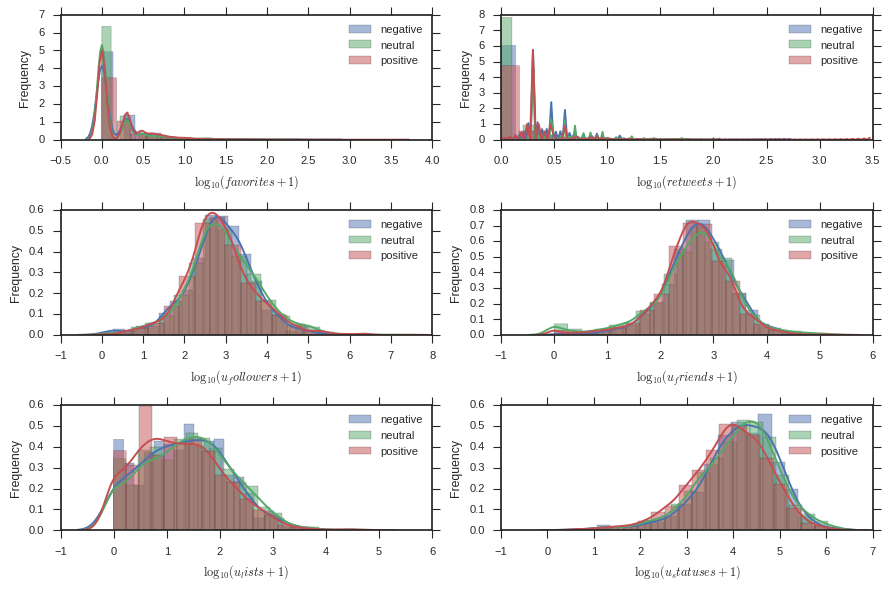

In [18]:
fig, ax = plt.subplots(3,2,figsize=(9,6))
ax = ax.flatten()
for axi, k in zip(ax, ['favorites', 'retweets', 'u_followers',
          'u_friends', 'u_lists', 'u_statuses']):
    for label in df.label.unique():
        sns.distplot(np.log10(df[df.label == label][k]+1), bins=20,
                 hist_kws={'alpha': 0.5},
                     label=label, ax=axi)
    axi.set_xlabel('$\log_{10}(%s+1)$' % k)
    axi.set_ylabel('Frequency')
    axi.legend()
fig.tight_layout()

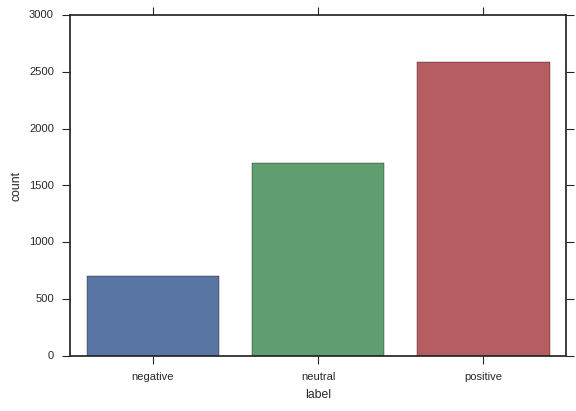

In [19]:
sns.countplot(x=df.label)

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import classification_report, confusion_matrix

In [40]:
X = np.log10(df[['u_followers', 'u_friends', 'u_statuses', 'u_lists', 'favorites', 'retweets']] + 1).copy()
y = df['label'].copy()

In [45]:
class_instance_weight = {
    'positive': 1./2590,
    'negative': 1./707,
    'neutral': 1e-4
}
for model_name, model in zip(
    ["Logistic", "SVM", "NaiveBayes"],
    [
        LogisticRegression(multi_class='multinomial', solver='lbfgs'),
        LinearSVC(multi_class='crammer_singer'),
        GaussianNB()
    ]):
    #if model_name == "NaiveBayes":
    sample_weights = y.map(lambda k: class_instance_weight[k])
    model.fit(X,y, sample_weight=sample_weights)
    #else:
    #model.fit(X,y)
    model.score(X,y)
    y_pred = model.predict(X)
    print "Model: %s" % model_name
    print classification_report(y, y_pred)
    print confusion_matrix(y, y_pred)

Model: Logistic
             precision    recall  f1-score   support

   negative       0.16      0.60      0.26       707
    neutral       0.00      0.00      0.00      1697
   positive       0.58      0.54      0.56      2590

avg / total       0.32      0.36      0.32      4994

[[ 424    0  283]
 [ 954    0  743]
 [1198    0 1392]]
Model: SVM
             precision    recall  f1-score   support

   negative       0.18      0.04      0.07       707
    neutral       0.44      0.00      0.01      1697
   positive       0.52      0.97      0.68      2590

avg / total       0.45      0.51      0.37      4994

[[  31    6  670]
 [  74    8 1615]
 [  67    4 2519]]
Model: NaiveBayes
             precision    recall  f1-score   support

   negative       0.16      0.65      0.26       707
    neutral       0.49      0.03      0.05      1697
   positive       0.59      0.46      0.52      2590

avg / total       0.49      0.34      0.32      4994

[[ 463    5  239]
 [1040   46  611]
 [134

In [23]:
print model.class_prior_
print model.sigma_
print model.theta_
print model.classes_
print model.class_prior_[:,np.newaxis].shape, model.theta_.shape, model.sigma_.shape
pd.DataFrame(np.hstack((model.sigma_, model.theta_, model.class_prior_[:,np.newaxis])),
            columns=['sigma_%s' % k for k in X.columns] + ['theta_%s' % k for k in X.columns] + ['class_prior'])

[ 0.14156988  0.33980777  0.51862235]
[[ 0.64506822  0.38274868  0.65682396  0.63159738  0.09287422  0.07422773]
 [ 0.74780798  0.61930017  0.71213529  0.67638918  0.09751167  0.07559719]
 [ 0.69903086  0.4475765   0.6991701   0.65603841  0.11336716  0.06351108]]
[[ 2.85730316  2.71149094  4.13579099  1.33431027  0.16824064  0.10145908]
 [ 2.93652745  2.63699946  4.10540624  1.40000573  0.15897689  0.10953306]
 [ 2.84855571  2.63118607  3.92802301  1.24362993  0.20297584  0.0922806 ]]
['negative' 'neutral' 'positive']
(3, 1) (3, 6) (3, 6)


,sigma_u_followers,sigma_u_friends,sigma_u_statuses,sigma_u_lists,sigma_favorites,sigma_retweets,theta_u_followers,theta_u_friends,theta_u_statuses,theta_u_lists,theta_favorites,theta_retweets,class_prior
0,0.645068,0.382749,0.656824,0.631597,0.092874,0.074228,2.857303,2.711491,4.135791,1.334310,0.168241,0.101459,0.141570
1,0.747808,0.619300,0.712135,0.676389,0.097512,0.075597,2.936527,2.636999,4.105406,1.400006,0.158977,0.109533,0.339808
2,0.699031,0.447576,0.699170,0.656038,0.113367,0.063511,2.848556,2.631186,3.928023,1.243630,0.202976,0.092281,0.518622


In [38]:
y[y=='neutral'] = 'negative'
class_instance_weight = {
    'positive': 1.,
    'negative': 1.,
    'neutral': 1.
}
for model_name, model in zip(
    ["Logistic", "SVM", "NaiveBayes"],
    [
        LogisticRegression(multi_class='multinomial', solver='lbfgs'),
        LinearSVC(multi_class='crammer_singer'),
        GaussianNB()
    ]):
    if model_name == "NaiveBayes":
        sample_weights = y.map(lambda k: class_instance_weight[k])
        model.fit(X,y, sample_weight=sample_weights)
    else:
        model.fit(X,y)
    model.score(X,y)
    y_pred = model.predict(X)
    print "Model: %s" % model_name
    print classification_report(y, y_pred)
    print confusion_matrix(y, y_pred)

Model: Logistic
             precision    recall  f1-score   support

   negative       0.50      0.00      0.00       707
   positive       0.79      1.00      0.88      2590

avg / total       0.72      0.79      0.69      3297

[[   1  706]
 [   1 2589]]
Model: SVM
             precision    recall  f1-score   support

   negative       0.00      0.00      0.00       707
   positive       0.79      1.00      0.88      2590

avg / total       0.62      0.79      0.69      3297

[[   0  707]
 [   0 2590]]
Model: NaiveBayes
             precision    recall  f1-score   support

   negative       0.44      0.01      0.01       707
   positive       0.79      1.00      0.88      2590

avg / total       0.71      0.79      0.69      3297

[[   4  703]
 [   5 2585]]


In [37]:
X = np.log10(df[['u_followers', 'u_friends', 'u_statuses', 'u_lists', 'favorites', 'retweets']] + 1).copy()
y = df['label'].copy()
idx = (y != 'neutral')
X = X[idx]
y = y[idx]
class_instance_weight = {
    'positive': 1.,
    'negative': 3.,
    'neutral': 1.
}
for model_name, model in zip(
    ["Logistic", "SVM", "NaiveBayes"],
    [
        LogisticRegression(multi_class='multinomial', solver='lbfgs'),
        LinearSVC(multi_class='crammer_singer'),
        GaussianNB()
    ]):
    if model_name == "NaiveBayes":
        sample_weights = y.map(lambda k: class_instance_weight[k])
        model.fit(X,y, sample_weight=sample_weights)
    else:
        model.fit(X,y)
    model.score(X,y)
    y_pred = model.predict(X)
    print "Model: %s" % model_name
    print classification_report(y, y_pred)
    print confusion_matrix(y, y_pred)

Model: Logistic
             precision    recall  f1-score   support

   negative       0.50      0.00      0.00       707
   positive       0.79      1.00      0.88      2590

avg / total       0.72      0.79      0.69      3297

[[   1  706]
 [   1 2589]]
Model: SVM
             precision    recall  f1-score   support

   negative       0.00      0.00      0.00       707
   positive       0.79      1.00      0.88      2590

avg / total       0.62      0.79      0.69      3297

[[   0  707]
 [   0 2590]]
Model: NaiveBayes
             precision    recall  f1-score   support

   negative       0.28      0.50      0.36       707
   positive       0.83      0.65      0.73      2590

avg / total       0.71      0.62      0.65      3297

[[ 353  354]
 [ 912 1678]]


In [26]:
from scipy.stats import ttest_ind

In [27]:
for k in X.columns:
    print "[%s]\tT-test: %.3f (p=%.5f)" % ((k,) + ttest_ind(
        X[y=='positive'][k],
        X[y=='negative'][k],
    ))

[u_followers]	T-test: -0.249 (p=0.80372)
[u_friends]	T-test: -2.873 (p=0.00409)
[u_statuses]	T-test: -5.892 (p=0.00000)
[u_lists]	T-test: -2.648 (p=0.00813)
[favorites]	T-test: 2.479 (p=0.01322)
[retweets]	T-test: -0.843 (p=0.39932)


In [28]:
from statsmodels.api import OLS, MNLogit, Logit

In [29]:
levels = ["neutral", "negative", "positive"]
for k in X.columns:
    model = OLS.from_formula('np.log10(%s+1) ~ C(label, levels=levels)' % k, data=df)
    res = model.fit()
    print res.summary2()

                           Results: Ordinary least squares
Model:                  OLS                         Adj. R-squared:       0.002     
Dependent Variable:     np.log10(u_followers + 1)   AIC:                  12453.6357
Date:                   2017-01-05 13:08            BIC:                  12473.1837
No. Observations:       4994                        Log-Likelihood:       -6223.8   
Df Model:               2                           F-statistic:          5.892     
Df Residuals:           4991                        Prob (F-statistic):   0.00278   
R-squared:              0.002                       Scale:                0.70839   
------------------------------------------------------------------------------------
                                     Coef.  Std.Err.    t     P>|t|   [0.025  0.975]
------------------------------------------------------------------------------------
Intercept                            2.9365   0.0204 143.7270 0.0000  2.8965  2.9766
C(labe

In [30]:
model = MNLogit.from_formula(('C(label,levels=levels)'
                              ' ~ C(is_quote) + C(is_reply)'
                              #'+ np.log10(favorites+1) + np.log10(retweets+1)'
                              #'+ np.log10(u_followers+1) + np.log10(u_friends+1)'
                              #'+ np.log10(u_lists+1) + np.log10(u_statuses+1)'
                             ),
                             data=df)
res = model.fit()
res.summary()

Optimization terminated successfully.
         Current function value: 0.977401
         Iterations 5


/home/entity/anaconda2/lib/python2.7/site-packages/statsmodels/discrete/discrete_model.py:580: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  start_params = np.zeros((self.K * (self.J-1)))
/home/entity/anaconda2/lib/python2.7/site-packages/statsmodels/discrete/discrete_model.py:1840: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  params = params.reshape(self.K, -1, order='F')
/home/entity/anaconda2/lib/python2.7/site-packages/statsmodels/discrete/discrete_model.py:1756: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  params = params.reshape(self.K, -1, order='F')
/home/entity/anaconda2/lib/python2.7/site-packages/statsmodels/discrete/discrete_model.py:1697: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  params = par

<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                 4994
Model:                        MNLogit   Df Residuals:                     4988
Method:                           MLE   Df Model:                            4
Date:                Thu, 05 Jan 2017   Pseudo R-squ.:                0.006768
Time:                        13:08:57   Log-Likelihood:                -4881.1
converged:                       True   LL-Null:                       -4914.4
                                        LLR p-value:                 1.231e-13
=======================================================================================================
y=C(label, levels=levels)[negative]       coef    std err          z      P>|z|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------------------------
Intercept                              -0.8159      0.107     -7.649      0.000        -1.025    -0.607
C(is_quote)[T.True]                     0.7103      0.165      4.314      0.000         0.388     1.033
C(is_reply)[T.True]                    -0.1383      0.119     -1.166      0.243        -0.371     0.094
-------------------------------------------------------------------------------------------------------
y=C(label, levels=levels)[positive]       coef    std err          z      P>|z|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------------------------
Intercept                               0.1230      0.081      1.514      0.130        -0.036     0.282
C(is_quote)[T.True]                    -0.3997      0.148     -2.710      0.007        -0.689    -0.111
C(is_reply)[T.True]                     0.3729      0.088      4.221      0.000         0.200     0.546
=======================================================================================================
"""

In [31]:
model = MNLogit.from_formula(('C(label,levels=levels)'
                              ' ~ '#C(is_quote) + C(is_reply)'
                              '+ np.log10(favorites+1) + np.log10(retweets+1)'
                              '+ np.log10(u_followers+1) + np.log10(u_friends+1)'
                              '+ np.log10(u_lists+1) + np.log10(u_statuses+1)'
                             ),
                             data=df)
res = model.fit()
res.summary()

Optimization terminated successfully.
         Current function value: 0.965686
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                 4994
Model:                        MNLogit   Df Residuals:                     4980
Method:                           MLE   Df Model:                           12
Date:                Thu, 05 Jan 2017   Pseudo R-squ.:                 0.01867
Time:                        13:08:58   Log-Likelihood:                -4822.6
converged:                       True   LL-Null:                       -4914.4
                                        LLR p-value:                 8.055e-33
=======================================================================================================
y=C(label, levels=levels)[negative]       coef    std err          z      P>|z|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------------------------
Intercept                              -1.5761      0.288     -5.480      0.000        -2.140    -1.012
np.log10(favorites + 1)                 0.4817      0.208      2.316      0.021         0.074     0.889
np.log10(retweets + 1)                 -0.0225      0.248     -0.091      0.928        -0.508     0.463
np.log10(u_followers + 1)              -0.5354      0.118     -4.527      0.000        -0.767    -0.304
np.log10(u_friends + 1)                 0.4377      0.088      4.947      0.000         0.264     0.611
np.log10(u_lists + 1)                  -0.0417      0.097     -0.428      0.669        -0.232     0.149
np.log10(u_statuses + 1)                0.2569      0.075      3.426      0.001         0.110     0.404
-------------------------------------------------------------------------------------------------------
y=C(label, levels=levels)[positive]       coef    std err          z      P>|z|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------------------------
Intercept                               0.9503      0.192      4.952      0.000         0.574     1.326
np.log10(favorites + 1)                 1.0031      0.143      7.007      0.000         0.723     1.284
np.log10(retweets + 1)                 -0.9865      0.176     -5.605      0.000        -1.331    -0.642
np.log10(u_followers + 1)               0.0954      0.077      1.239      0.215        -0.055     0.246
np.log10(u_friends + 1)                 0.1017      0.056      1.827      0.068        -0.007     0.211
np.log10(u_lists + 1)                  -0.1858      0.068     -2.752      0.006        -0.318    -0.053
np.log10(u_statuses + 1)               -0.2258      0.051     -4.416      0.000        -0.326    -0.126
=======================================================================================================
"""

In [32]:
model = MNLogit.from_formula(('C(label,levels=levels)'
                              ' ~ C(is_quote) + C(is_reply)'
                              '+ np.log10(favorites+1) + np.log10(retweets+1)'
                              '+ np.log10(u_followers+1) + np.log10(u_friends+1)'
                              '+ np.log10(u_lists+1) + np.log10(u_statuses+1)'
                             ),
                             data=df)
res = model.fit()
res.summary()

Optimization terminated successfully.
         Current function value: 0.960041
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                 4994
Model:                        MNLogit   Df Residuals:                     4976
Method:                           MLE   Df Model:                           16
Date:                Thu, 05 Jan 2017   Pseudo R-squ.:                 0.02441
Time:                        13:08:58   Log-Likelihood:                -4794.4
converged:                       True   LL-Null:                       -4914.4
                                        LLR p-value:                 6.060e-42
=======================================================================================================
y=C(label, levels=levels)[negative]       coef    std err          z      P>|z|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------------------------
Intercept                              -1.5200      0.307     -4.943      0.000        -2.123    -0.917
C(is_quote)[T.True]                     0.7000      0.167      4.203      0.000         0.374     1.026
C(is_reply)[T.True]                    -0.0854      0.120     -0.710      0.478        -0.321     0.150
np.log10(favorites + 1)                 0.5052      0.209      2.412      0.016         0.095     0.916
np.log10(retweets + 1)                 -0.0545      0.250     -0.218      0.827        -0.544     0.435
np.log10(u_followers + 1)              -0.5161      0.118     -4.357      0.000        -0.748    -0.284
np.log10(u_friends + 1)                 0.4141      0.089      4.648      0.000         0.239     0.589
np.log10(u_lists + 1)                  -0.0652      0.098     -0.665      0.506        -0.257     0.127
np.log10(u_statuses + 1)                0.2568      0.076      3.399      0.001         0.109     0.405
-------------------------------------------------------------------------------------------------------
y=C(label, levels=levels)[positive]       coef    std err          z      P>|z|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------------------------
Intercept                               0.6137      0.209      2.939      0.003         0.204     1.023
C(is_quote)[T.True]                    -0.3257      0.149     -2.180      0.029        -0.619    -0.033
C(is_reply)[T.True]                     0.3708      0.090      4.125      0.000         0.195     0.547
np.log10(favorites + 1)                 0.9843      0.144      6.846      0.000         0.702     1.266
np.log10(retweets + 1)                 -1.0107      0.177     -5.721      0.000        -1.357    -0.664
np.log10(u_followers + 1)               0.0795      0.077      1.031      0.302        -0.072     0.231
np.log10(u_friends + 1)                 0.1232      0.056      2.203      0.028         0.014     0.233
np.log10(u_lists + 1)                  -0.1772      0.068     -2.617      0.009        -0.310    -0.044
np.log10(u_statuses + 1)               -0.2210      0.051     -4.317      0.000        -0.321    -0.121
=======================================================================================================
"""

In [33]:
model = MNLogit.from_formula(('label'
                              ' ~ C(is_quote) + C(is_reply)'
                              '+ np.log10(favorites+1) + np.log10(retweets+1)'
                              '+ np.log10(u_followers+1) + np.log10(u_friends+1)'
                              '+ np.log10(u_lists+1) + np.log10(u_statuses+1)'
                             ),
                             data=df[df.label != 'neutral'])
res = model.fit()
res.summary()

Optimization terminated successfully.
         Current function value: 0.499322
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                 3297
Model:                        MNLogit   Df Residuals:                     3288
Method:                           MLE   Df Model:                            8
Date:                Thu, 05 Jan 2017   Pseudo R-squ.:                 0.03935
Time:                        13:08:58   Log-Likelihood:                -1646.3
converged:                       True   LL-Null:                       -1713.7
                                        LLR p-value:                 2.754e-25
=============================================================================================
        y=label[positive]       coef    std err          z      P>|z|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------------
Intercept                     2.2143      0.302      7.344      0.000         1.623     2.805
C(is_quote)[T.True]          -0.9947      0.164     -6.048      0.000        -1.317    -0.672
C(is_reply)[T.True]           0.4254      0.118      3.605      0.000         0.194     0.657
np.log10(favorites + 1)       0.4678      0.196      2.388      0.017         0.084     0.852
np.log10(retweets + 1)       -0.9675      0.245     -3.954      0.000        -1.447    -0.488
np.log10(u_followers + 1)     0.6278      0.117      5.376      0.000         0.399     0.857
np.log10(u_friends + 1)      -0.3125      0.091     -3.420      0.001        -0.492    -0.133
np.log10(u_lists + 1)        -0.1177      0.093     -1.270      0.204        -0.299     0.064
np.log10(u_statuses + 1)     -0.4977      0.075     -6.672      0.000        -0.644    -0.352
=============================================================================================
"""

In [34]:
model = MNLogit.from_formula(('label'
                              ' ~ C(is_quote) + C(is_reply)'
                              '+ np.log10(favorites+1) + np.log10(retweets+1)'
                              '+ np.log10(u_followers+1) + np.log10(u_friends+1)'
                              '+ np.log10(u_lists+1) + np.log10(u_statuses+1)'
                              '+ I(favorites==0) + I(retweets==0)'
                              '+ I(u_followers==0) + I(u_friends==0)'
                              '+ I(u_lists==0)'
                             ),
                             data=df[df.label != 'neutral'])
res = model.fit_regularized(alpha=1)
res.summary()

/home/entity/anaconda2/lib/python2.7/site-packages/statsmodels/discrete/discrete_model.py:598: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  start_params = np.zeros((self.K * (self.J-1)))
/home/entity/anaconda2/lib/python2.7/site-packages/statsmodels/discrete/discrete_model.py:606: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  mnfit.params = mnfit.params.reshape(self.K, -1, order='F')


Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.500365605139
            Iterations: 165
            Function evaluations: 166
            Gradient evaluations: 165


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                 3297
Model:                        MNLogit   Df Residuals:                     3283
Method:                           MLE   Df Model:                           13
Date:                Thu, 05 Jan 2017   Pseudo R-squ.:                 0.04281
Time:                        13:08:58   Log-Likelihood:                -1640.3
converged:                       True   LL-Null:                       -1713.7
                                        LLR p-value:                 9.458e-25
===============================================================================================
          y=label[positive]       coef    std err          z      P>|z|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------------
Intercept                       2.4100      0.377      6.394      0.000         1.671     3.149
C(is_quote)[T.True]            -0.9823      0.165     -5.946      0.000        -1.306    -0.659
C(is_reply)[T.True]             0.4128      0.118      3.491      0.000         0.181     0.645
I(favorites == 0)[T.True]       0.0468      0.170      0.275      0.783        -0.286     0.380
I(retweets == 0)[T.True]       -0.2507      0.209     -1.202      0.229        -0.659     0.158
I(u_followers == 0)[T.True]    -0.6292      1.192     -0.528      0.598        -2.966     1.707
I(u_friends == 0)[T.True]       1.1434      0.798      1.434      0.152        -0.420     2.707
I(u_lists == 0)[T.True]        -0.2424      0.183     -1.323      0.186        -0.601     0.117
np.log10(favorites + 1)         0.5252      0.333      1.577      0.115        -0.128     1.178
np.log10(retweets + 1)         -1.2021      0.399     -3.010      0.003        -1.985    -0.419
np.log10(u_followers + 1)       0.5998      0.116      5.162      0.000         0.372     0.827
np.log10(u_friends + 1)        -0.2567      0.095     -2.690      0.007        -0.444    -0.070
np.log10(u_lists + 1)          -0.1574      0.096     -1.633      0.102        -0.346     0.031
np.log10(u_statuses + 1)       -0.4988      0.075     -6.630      0.000        -0.646    -0.351
===============================================================================================
"""

## Narrative between positive and negative tweets:

* Less likely to be positive if is quote, if it gets more retweets, and if from person with more statuses
* More likely if it is reply, person with more followers

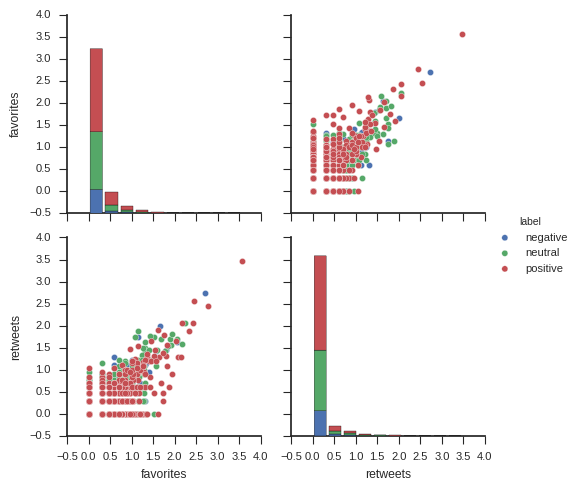

In [35]:
df_t = df[['favorites', 'retweets','label']].copy()
df_t.ix[:, ['favorites', 'retweets']] = np.log10(df_t[['favorites', 'retweets']]+1)
sns.pairplot(df_t, vars=['favorites', 'retweets'], hue='label')

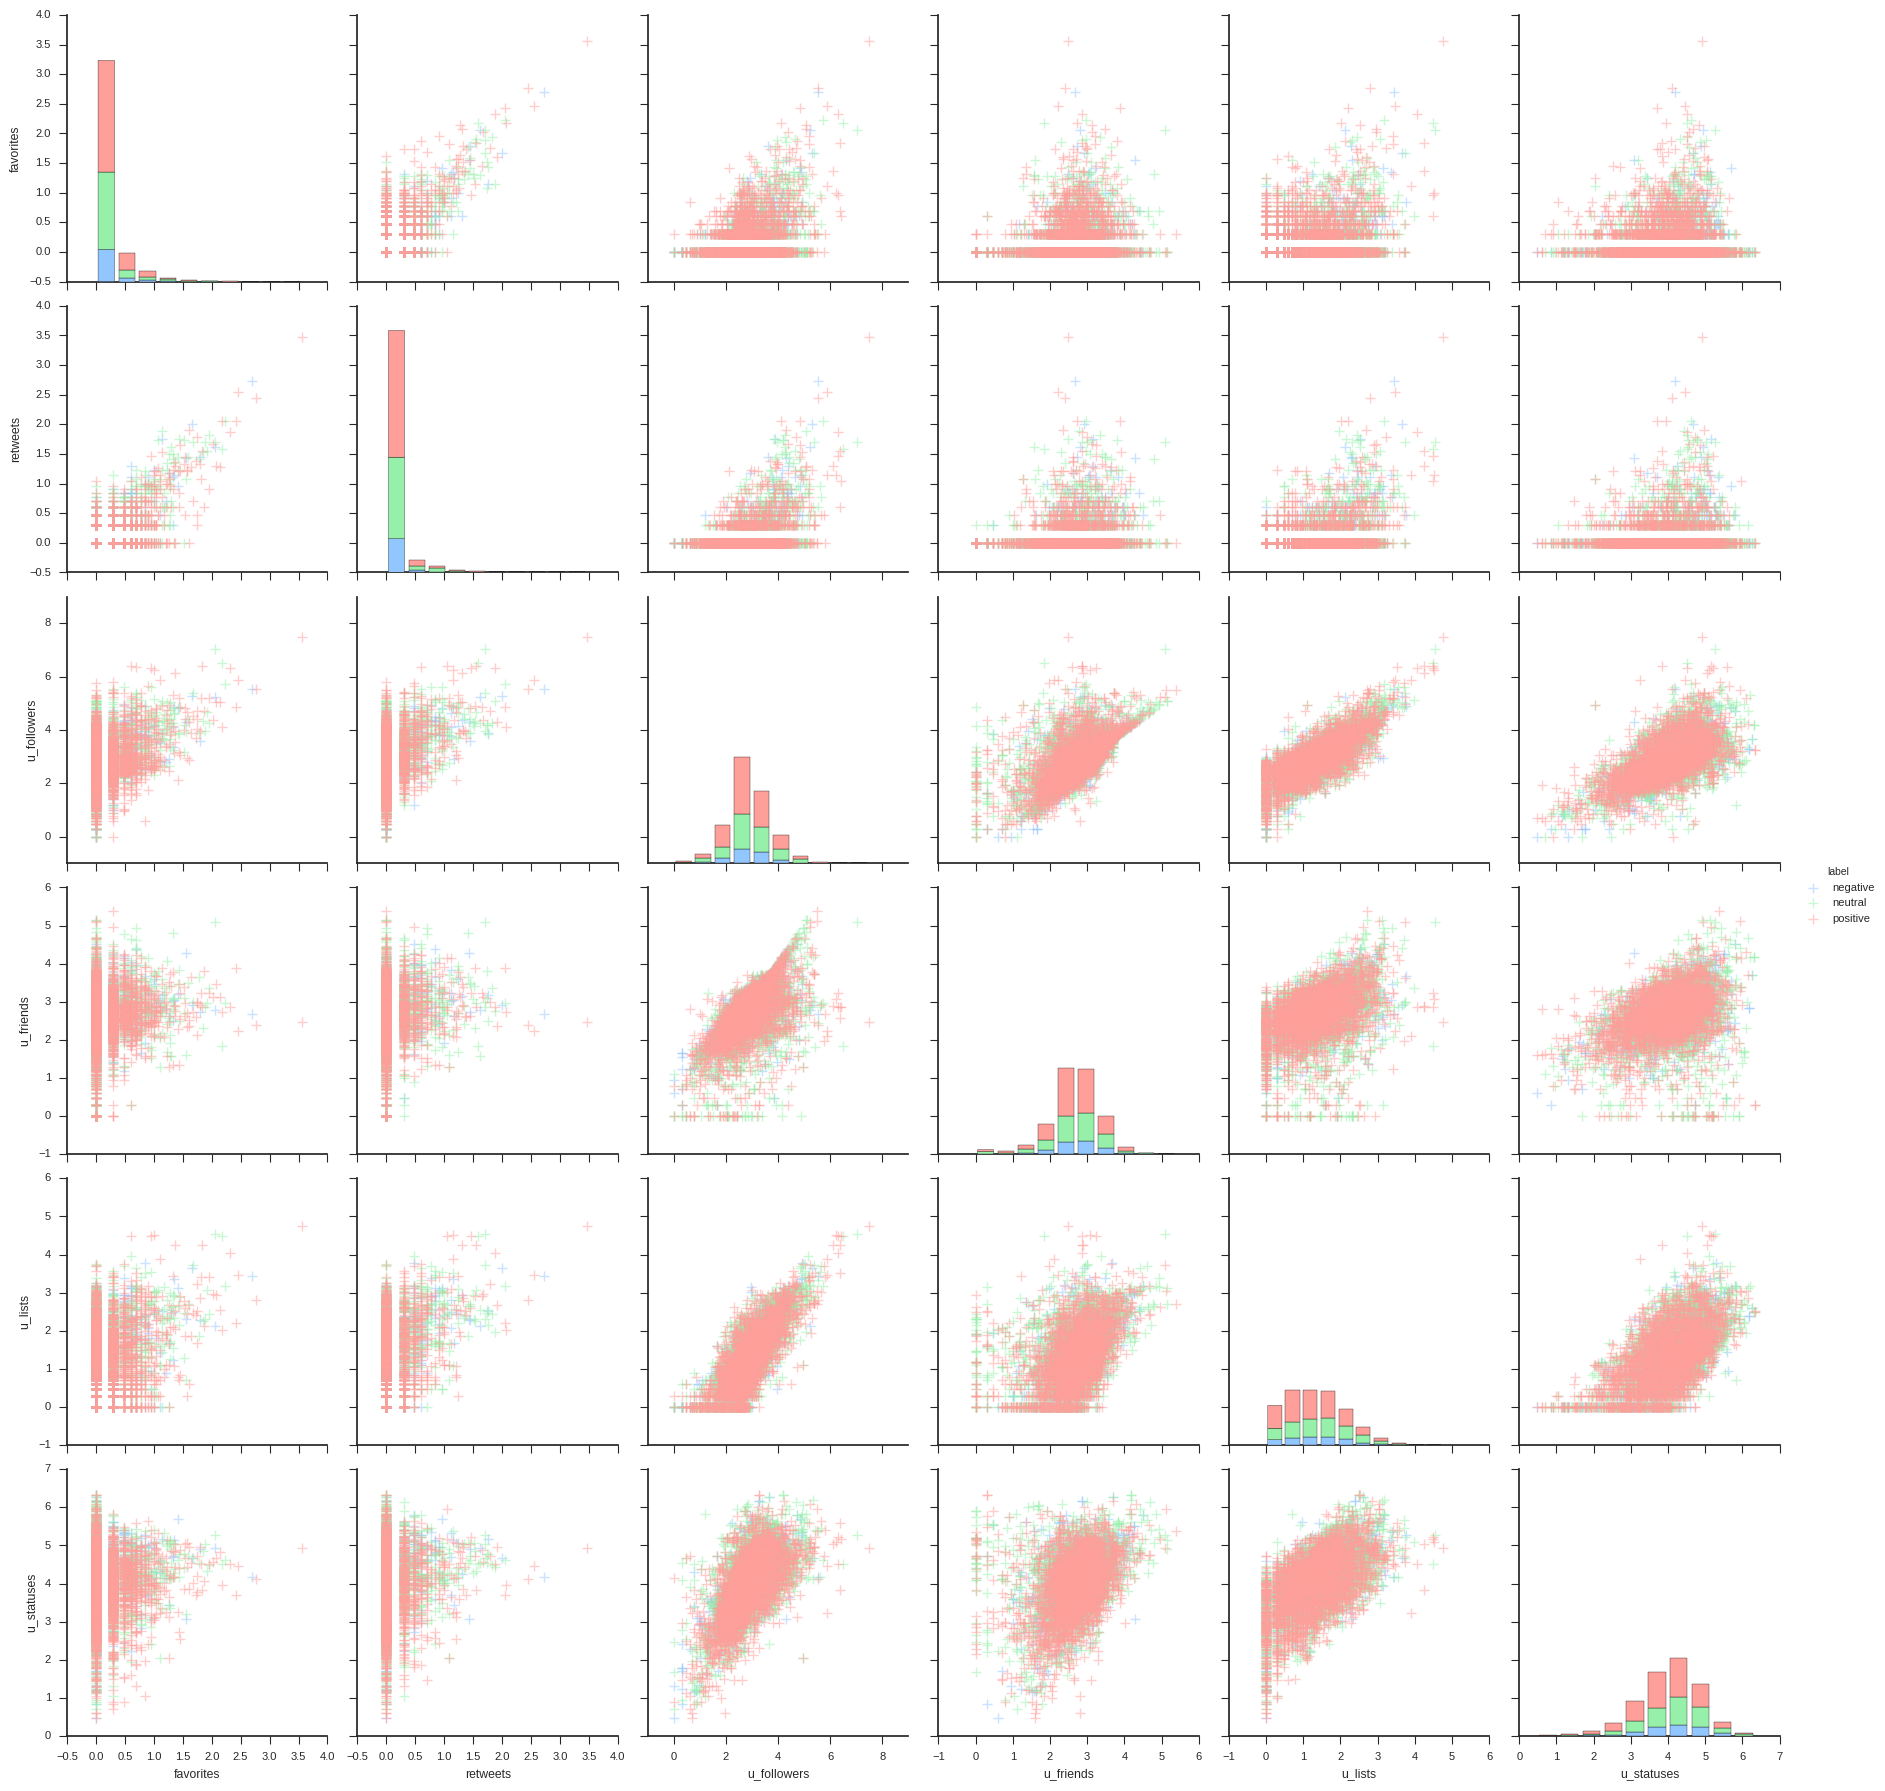

In [36]:
t_cols = ['favorites', 'retweets', 'u_followers',
          'u_friends', 'u_lists', 'u_statuses',
          'label']
df_t = df[t_cols].copy()
df_t.ix[:, t_cols[:-1]] = np.log10(df_t[t_cols[:-1]]+1)
sns.pairplot(df_t, vars=t_cols[:-1], hue=t_cols[-1],
             palette="pastel", size=3.0,
            markers="+", plot_kws=dict(s=50, linewidth=1, alpha=0.5))